In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import autograd
import torch.nn.functional as F
import time

images = np.load("D:/work/JHUschoolStuff/machinelearning/project1/cs475_project_data/images.npy")
labels = np.load("D:/work/JHUschoolStuff/machinelearning/project1/cs475_project_data/labels.npy")
test = np.load("D:/work/JHUschoolStuff/machinelearning/project1/cs475_project_data/test_images.npy")
height = images.shape[1]
width = images.shape[2]
size = height * width
images = (images - images.mean()) / images.std()
data = images.reshape(images.shape[0],size)
test_data = test.reshape(test.shape[0], size)
test_data = (test_data - test_data.mean()) / test_data.std()
NUM_OPT_STEPS = 5000
train_seqs = data[0:45000,:]
train_labels = labels[0:45000]
val_seqs = data[45000:,:]
val_labels = labels[45000:]

In [19]:
class TwoLayerNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = torch.nn.Linear(height * width, 100)
        self.layer_2 = torch.nn.Linear(100, 5)
    def forward(self, x):
        x = self.layer_1(x)
        y = F.relu(x)
        z = self.layer_2(y)
        return z

In [20]:
def train(batch_size):
    # model.train() puts our model in train mode, which can require different
    # behavior than eval mode (for example in the case of dropout).
    model.train()
    # i is is a 1-D array with shape [batch_size]
    i = np.random.choice(train_seqs.shape[0], size=batch_size, replace=False)
    x = autograd.Variable(torch.from_numpy(train_seqs[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(train_labels[i].astype(np.int))).long()
    optimizer.zero_grad()
    y_hat_ = model(x)
    loss = F.cross_entropy(y_hat_, y)
    loss.backward()
    optimizer.step()
    return loss.data[0]


In [21]:
def approx_train_accuracy(model):
    i = np.random.choice(train_seqs.shape[0], size=1000, replace=False)
    x = autograd.Variable(torch.from_numpy(train_seqs[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(train_labels[i].astype(np.int)))
    y_hat_ = model(x)
    y_hat = np.zeros(1000)
    for i in range(1000):
        y_hat[i] = torch.max(y_hat_[i,:].data, 0)[1][0]
    return accuracy(y_hat, y.data.numpy())

In [22]:
def val_accuracy(model):
    x = autograd.Variable(torch.from_numpy(val_seqs.astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(val_labels.astype(np.int)))
    y_hat_ = model(x)
    y_hat = np.zeros(5000)
    for i in range(5000):
        y_hat[i] = torch.max(y_hat_[i,:].data, 0)[1][0]
    return accuracy(y_hat, y.data.numpy())

In [23]:
def accuracy(y, y_hat):
    return (y == y_hat).astype(np.float).mean()

In [24]:
def plot(train_accs, val_accs):
    plt.figure(200)
    plt.title('Training Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.plot(train_accs, 'b')
    plt.show()
    plt.figure(300)
    plt.title('Validation Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')   
    plt.plot(val_accs, 'b')
    plt.show()

In [25]:
def runModel(model, batch_size):
    train_accs, val_accs = [], []
    for i in range(NUM_OPT_STEPS):
        train(batch_size)
        if i % 100 == 0:
            train_accs.append(approx_train_accuracy(model))
            val_accs.append(val_accuracy(model))
            print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))
    plot(train_accs, val_accs)

     0  0.18  0.18
   100  0.58  0.61
   200  0.59  0.58
   300  0.70  0.70
   400  0.67  0.69
   500  0.65  0.67
   600  0.70  0.72
   700  0.71  0.72
   800  0.67  0.69
   900  0.74  0.73
  1000  0.72  0.72
  1100  0.72  0.73
  1200  0.70  0.72
  1300  0.71  0.73
  1400  0.75  0.75
  1500  0.76  0.75
  1600  0.75  0.75
  1700  0.76  0.76
  1800  0.75  0.76
  1900  0.73  0.75
  2000  0.75  0.75
  2100  0.69  0.74
  2200  0.74  0.76
  2300  0.74  0.76
  2400  0.74  0.75
  2500  0.77  0.77
  2600  0.75  0.76
  2700  0.68  0.68
  2800  0.76  0.75
  2900  0.78  0.77
  3000  0.76  0.75
  3100  0.75  0.74
  3200  0.75  0.77
  3300  0.78  0.76
  3400  0.78  0.78
  3500  0.77  0.77
  3600  0.73  0.77
  3700  0.74  0.75
  3800  0.78  0.77
  3900  0.71  0.75
  4000  0.73  0.74
  4100  0.76  0.78
  4200  0.79  0.77
  4300  0.76  0.77
  4400  0.77  0.77
  4500  0.77  0.78
  4600  0.74  0.77
  4700  0.76  0.78
  4800  0.74  0.77
  4900  0.76  0.76


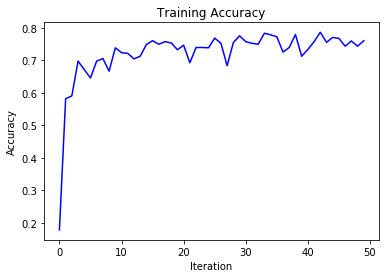

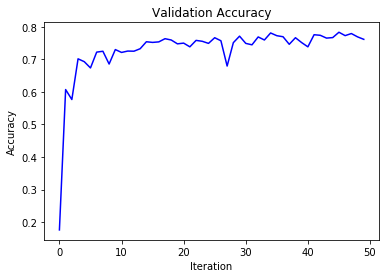

In [26]:
model = TwoLayerNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
runModel(model, 1)

In [27]:
for m in model.children():
    m.reset_parameters()

     0  0.29  0.34
   100  0.72  0.74
   200  0.76  0.76
   300  0.71  0.73
   400  0.77  0.79
   500  0.79  0.79
   600  0.79  0.79
   700  0.80  0.79
   800  0.81  0.80
   900  0.78  0.80
  1000  0.81  0.81
  1100  0.80  0.80
  1200  0.85  0.83
  1300  0.84  0.82
  1400  0.81  0.81
  1500  0.83  0.82
  1600  0.83  0.83
  1700  0.81  0.82
  1800  0.84  0.83
  1900  0.83  0.84
  2000  0.83  0.83
  2100  0.83  0.83
  2200  0.83  0.84
  2300  0.84  0.83
  2400  0.86  0.84
  2500  0.81  0.82
  2600  0.82  0.83
  2700  0.84  0.83
  2800  0.86  0.84
  2900  0.86  0.84
  3000  0.84  0.84
  3100  0.84  0.84
  3200  0.86  0.84
  3300  0.85  0.84
  3400  0.83  0.82
  3500  0.84  0.84
  3600  0.84  0.83
  3700  0.86  0.84
  3800  0.85  0.84
  3900  0.84  0.84
  4000  0.86  0.84
  4100  0.86  0.85
  4200  0.88  0.84
  4300  0.87  0.85
  4400  0.85  0.85
  4500  0.86  0.84
  4600  0.87  0.84
  4700  0.86  0.85
  4800  0.85  0.85
  4900  0.87  0.85


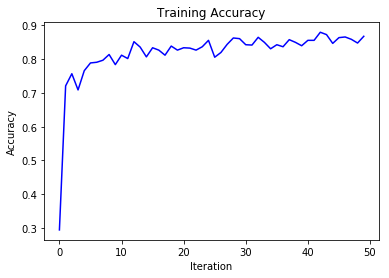

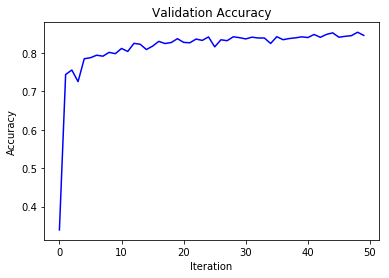

In [28]:
model = TwoLayerNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
runModel(model, 10)

In [29]:
for m in model.children():
    m.reset_parameters()

     0  0.23  0.21
   100  0.79  0.78
   200  0.81  0.80
   300  0.81  0.81
   400  0.83  0.82
   500  0.84  0.83
   600  0.82  0.84
   700  0.82  0.84
   800  0.85  0.84
   900  0.85  0.83
  1000  0.86  0.84
  1100  0.85  0.84
  1200  0.86  0.84
  1300  0.85  0.85
  1400  0.87  0.85
  1500  0.86  0.84
  1600  0.88  0.86
  1700  0.88  0.85
  1800  0.87  0.86
  1900  0.90  0.86
  2000  0.88  0.86
  2100  0.87  0.86
  2200  0.88  0.86
  2300  0.90  0.87
  2400  0.89  0.86
  2500  0.89  0.86
  2600  0.90  0.86
  2700  0.89  0.86
  2800  0.90  0.87
  2900  0.92  0.87
  3000  0.91  0.86
  3100  0.90  0.86
  3200  0.91  0.86
  3300  0.90  0.87
  3400  0.92  0.86
  3500  0.93  0.86
  3600  0.91  0.86
  3700  0.90  0.87
  3800  0.92  0.87
  3900  0.92  0.87
  4000  0.93  0.86
  4100  0.90  0.86
  4200  0.90  0.87
  4300  0.93  0.86
  4400  0.92  0.87
  4500  0.90  0.87
  4600  0.93  0.87
  4700  0.93  0.86
  4800  0.92  0.87
  4900  0.93  0.87


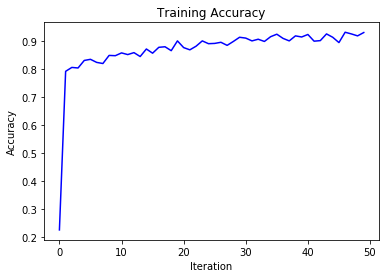

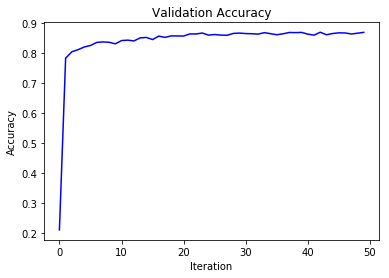

18.778249740600586


In [30]:
start = time.time()
runModel(model, 64)
end = time.time()
print(end - start)

The best validation accuracy I achieved was 88. The batch size used was 64 and the learning rate was 0.001. I used 5000 optimization steps to reach this accuracy. Initially I had tried 10k however it seemed to not improve after about 5k steps. Training only took ~19 seconds.